In [16]:
import cv2
import numpy as np
import os
import random
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Tải lại mô hình đã huấn luyện
model = load_model('D:/HK1 2024 2025/Deep Learning/BTL/Final/models/CNN_1.keras')

# Đường dẫn thư mục chứa ảnh
base_dir = 'D:/HK1 2024 2025/Deep Learning/BTL/Final/hard_test/'

# Danh sách các nhãn và ánh xạ nhãn
label_map = {0: 'A', 1: 'B', 2: 'C'}
inverse_label_map = {v: k for k, v in label_map.items()}

# Hàm lấy ngẫu nhiên một ảnh từ mỗi thư mục A, B, C
def load_random_image_from_folder(folder):
    folder_path = os.path.join(base_dir, folder)
    image_name = random.choice(os.listdir(folder_path))
    image_path = os.path.join(folder_path, image_name)
    
    # Đọc và xử lý ảnh
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (128, 128))
    image_resized = image_resized.astype('float32') / 255.0
    image_resized = np.expand_dims(image_resized, axis=0)
    
    return image, image_resized, folder  # Trả về ảnh gốc, ảnh xử lý và nhãn thực tế

# Hàm dự đoán nhãn và in kết quả
def predict_and_display_image(image, processed_image, actual_label):
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions)
    predicted_class = label_map[predicted_label]

    # In ảnh với nhãn dự đoán và nhãn thực tế
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Nhãn thực tế: {actual_label}, Nhãn dự đoán: {predicted_class}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


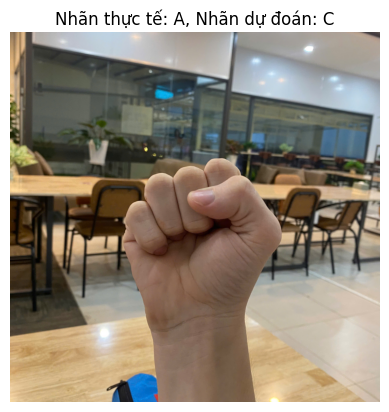

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


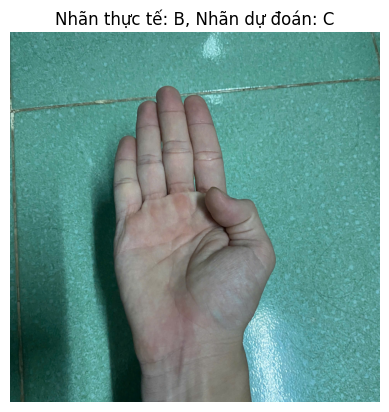

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


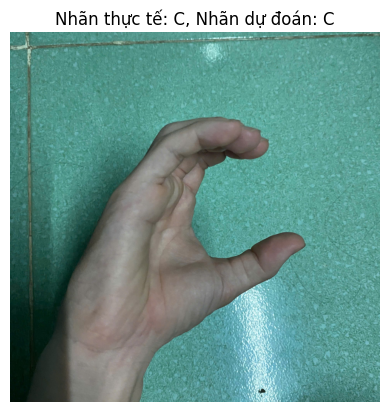

In [17]:
# Chọn ngẫu nhiên một ảnh từ mỗi thư mục và dự đoán
for label in ['A', 'B', 'C']:
    image, processed_image, actual_label = load_random_image_from_folder(label)
    predict_and_display_image(image, processed_image, actual_label)